In [315]:
from sklearn import linear_model
from sklearn import datasets
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder

In [316]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [317]:
import pandas as pd
df_weather = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ML/data/weatherHistory.csv')
df_weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [318]:
df_weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [319]:
df_weather.shape

(96453, 12)

In [320]:
df_weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Handling duplicate values

In [321]:
df_weather.duplicated().value_counts()

False    96429
True        24
dtype: int64

In [322]:
df_weather=df_weather.drop_duplicates()

Dropping formatted date, daily summary, loud cover columns

In [323]:
df_weather.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [324]:
df_weather=df_weather.drop(columns='Formatted Date',axis=1)

In [325]:
df_weather['Loud Cover'].value_counts()

0.0    96429
Name: Loud Cover, dtype: int64

In [326]:
df_weather=df_weather.drop(columns='Loud Cover',axis=1)

In [327]:
df_weather=df_weather.drop(columns='Daily Summary',axis=1)

Handling missing values

In [328]:
df_weather.isnull().values.any()

True

In [329]:
df_weather.isnull().values.all()

False

In [330]:
percent_missing = (df_weather.isnull().sum() * 100 / len(df_weather))
percent_missing

Summary                     0.000000
Precip Type                 0.536146
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Pressure (millibars)        0.000000
dtype: float64

In [331]:
df_weather['Precip Type'].value_counts()

rain    85200
snow    10712
Name: Precip Type, dtype: int64

In [332]:
df_weather.loc[df_weather['Precip Type'].isnull(),'Precip Type']='na'

In [333]:
df_weather['Precip Type'].value_counts()

rain    85200
snow    10712
na        517
Name: Precip Type, dtype: int64

Handling outliers

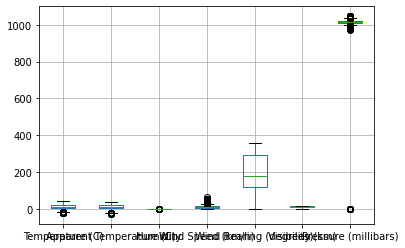

In [334]:
df_weather.boxplot()

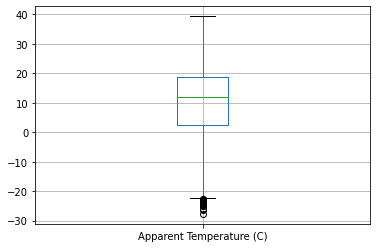

In [335]:
df_weather.boxplot(column='Apparent Temperature (C)')

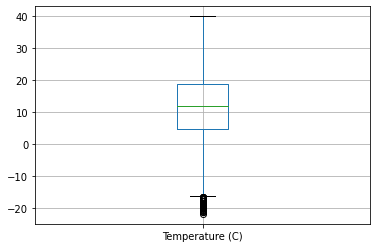

In [336]:
df_weather.boxplot(column='Temperature (C)')

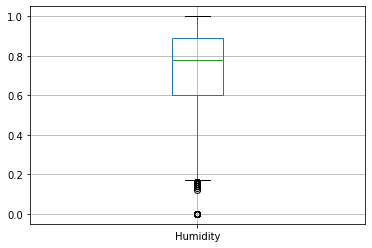

In [337]:
df_weather.boxplot(column='Humidity')

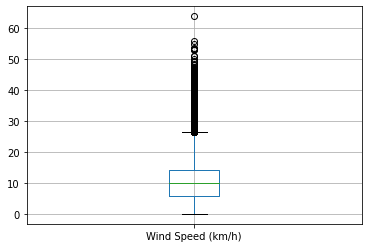

In [338]:
df_weather.boxplot(column='Wind Speed (km/h)')

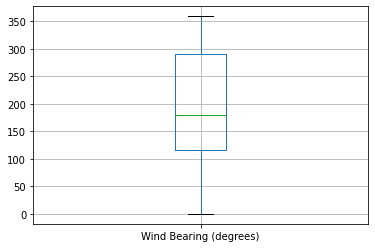

In [339]:
df_weather.boxplot(column='Wind Bearing (degrees)')

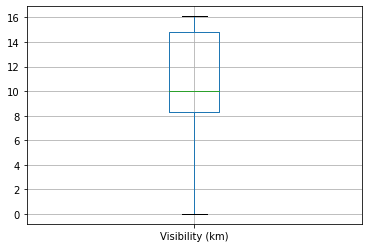

In [340]:
df_weather.boxplot(column='Visibility (km)')

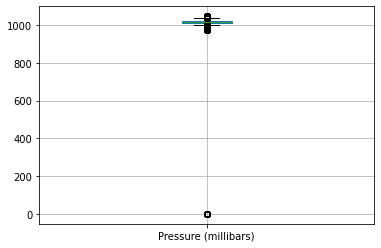

In [341]:
df_weather.boxplot(column='Pressure (millibars)')

In [342]:
df_weather1=df_weather.drop(df_weather[df_weather['Pressure (millibars)'] < 200].index)
print("Before Shape:",df_weather.shape)
print("After Shape:",df_weather1.shape)

df_weather=df_weather1;
df_weather=df_weather.reset_index(drop=True)

Before Shape: (96429, 9)
After Shape: (95141, 9)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc58e474ad0>,
      dtype=object)

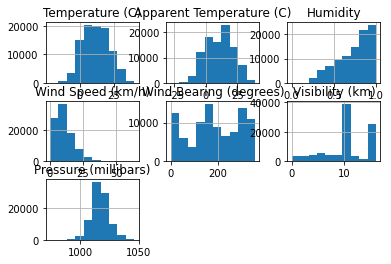

In [343]:
df_weather.hist()

In [344]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(df_weather, columns=['Summary', 'Precip Type', 'Temperature (C)','Humidity', 'Wind Speed (km/h)','Wind Bearing (degrees)', 'Visibility (km)','Pressure (millibars)'])
df.head(10)

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
5,Partly Cloudy,rain,9.222222,0.85,13.9587,258.0,14.9569,1016.66
6,Partly Cloudy,rain,7.733333,0.95,12.3648,259.0,9.9820,1016.72
7,Partly Cloudy,rain,8.772222,0.89,14.1519,260.0,9.9820,1016.84
8,Partly Cloudy,rain,10.822222,0.82,11.3183,259.0,9.9820,1017.37
9,Partly Cloudy,rain,13.772222,0.72,12.5258,279.0,9.9820,1017.22


In [345]:
# Put the target (Tempreture) in another DataFrame
target = pd.DataFrame(df_weather, columns=["Apparent Temperature (C)"])
target.tail(10)

,Apparent Temperature (C)
95131,29.450000
95132,29.616667
95133,29.611111
95134,29.311111
95135,27.850000
95136,26.016667
95137,24.583333
95138,22.038889
95139,21.522222
95140,20.438889


In [346]:
X = df.copy() #dataset has been copied to  X
y_true = target
X.head(10)

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
5,Partly Cloudy,rain,9.222222,0.85,13.9587,258.0,14.9569,1016.66
6,Partly Cloudy,rain,7.733333,0.95,12.3648,259.0,9.9820,1016.72
7,Partly Cloudy,rain,8.772222,0.89,14.1519,260.0,9.9820,1016.84
8,Partly Cloudy,rain,10.822222,0.82,11.3183,259.0,9.9820,1017.37
9,Partly Cloudy,rain,13.772222,0.72,12.5258,279.0,9.9820,1017.22


In [347]:
X.isna().any()

Summary                   False
Precip Type               False
Temperature (C)           False
Humidity                  False
Wind Speed (km/h)         False
Wind Bearing (degrees)    False
Visibility (km)           False
Pressure (millibars)      False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc586611dd0>,
      dtype=object)

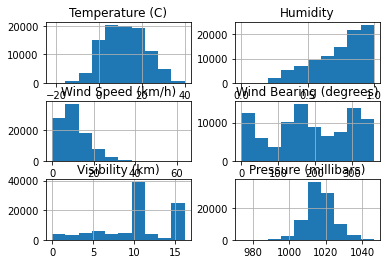

In [348]:
X.hist()

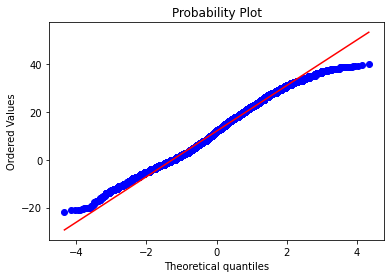

In [349]:
stats.probplot(X["Temperature (C)"], dist="norm", plot=plt)
plt.show()

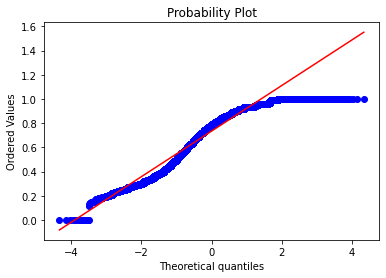

In [350]:
stats.probplot(X["Humidity"], dist="norm", plot=plt)
plt.show()

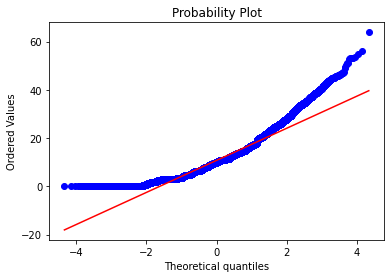

In [351]:
stats.probplot(X["Wind Speed (km/h)"], dist="norm", plot=plt)
plt.show()

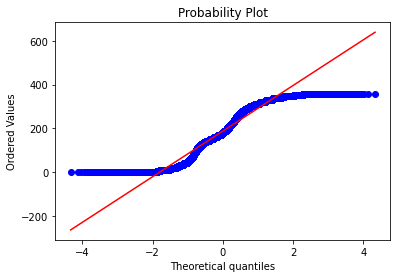

In [352]:
stats.probplot(X["Wind Bearing (degrees)"], dist="norm", plot=plt)
plt.show()

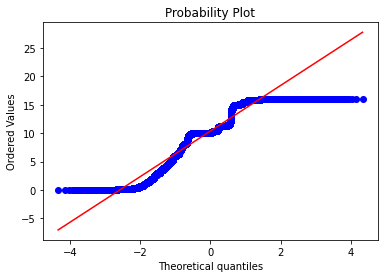

In [353]:
stats.probplot(X["Visibility (km)"], dist="norm", plot=plt)
plt.show()

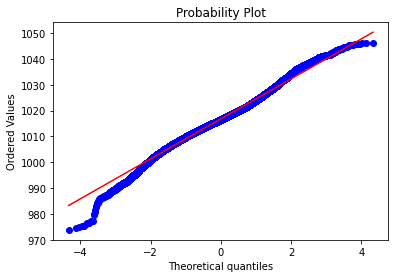

In [354]:
stats.probplot(X["Pressure (millibars)"], dist="norm", plot=plt)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5860a9710>]],
      dtype=object)

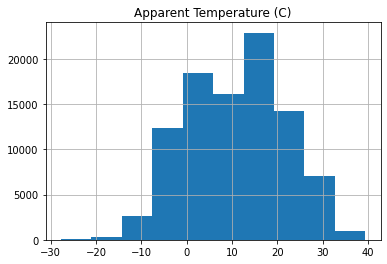

In [355]:
y_true.hist()

In [356]:
y_true

,Apparent Temperature (C)
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778
...,...
95136,26.016667
95137,24.583333
95138,22.038889
95139,21.522222


In [395]:
X1=X

Data Transformation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc58503d290>,
      dtype=object)

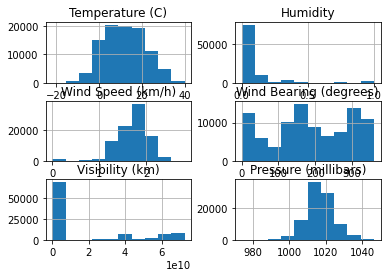

In [396]:
from sklearn.preprocessing import FunctionTransformer

data=X1
column=['Humidity']
exponential_transformer = FunctionTransformer(lambda x: x ** 3, validate=True)

data_new = exponential_transformer.transform(data[column])
X1['Humidity'] = data_new
X1.hist()   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5850890d0>,
      dtype=object)

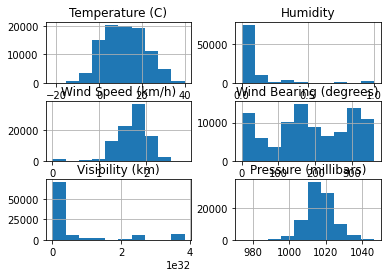

In [397]:

data=X1
column=['Visibility (km)']
exponential_transformer = FunctionTransformer(lambda x: x ** 3, validate=True)

data_new = exponential_transformer.transform(data[column])
X1['Visibility (km)'] = data_new
X.hist()

In [398]:
from sklearn.preprocessing import FunctionTransformer
# loading data
data = X1

# create columns variables to hold the columns that need transformation
columns = ['Wind Speed (km/h)']

# create the function transformer object with logarithm transformation
logarithm_transformer = FunctionTransformer(np.sqrt, validate=True)

# apply the transformation to your data
data_new = logarithm_transformer.transform(data[columns])
X1['Wind Speed (km/h)'] = data_new
X1.head(10)

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.043006,1.392285,251.0,2.416816e+32,1015.13
1,Partly Cloudy,rain,9.355556,0.017040,1.394063,259.0,2.416816e+32,1015.63
2,Mostly Cloudy,rain,9.377778,0.043006,1.186525,204.0,5.256818e+31,1015.94
3,Partly Cloudy,rain,8.288889,0.006533,1.392087,269.0,2.416816e+32,1016.41
4,Mostly Cloudy,rain,8.755556,0.006533,1.350186,259.0,2.416816e+32,1016.51
5,Partly Cloudy,rain,9.222222,0.012425,1.390291,258.0,5.256818e+31,1016.66
6,Partly Cloudy,rain,7.733333,0.250344,1.369378,259.0,9.525204e+26,1016.72
7,Partly Cloudy,rain,8.772222,0.043006,1.392682,260.0,9.525204e+26,1016.84
8,Partly Cloudy,rain,10.822222,0.004709,1.354324,259.0,9.525204e+26,1017.37
9,Partly Cloudy,rain,13.772222,0.000141,1.371594,279.0,9.525204e+26,1017.22


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc584b263d0>,
      dtype=object)

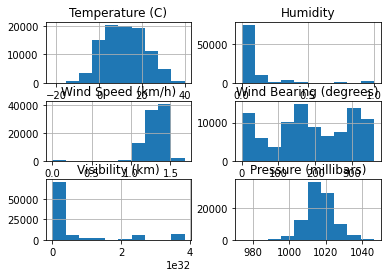

In [399]:
X1.hist()

In [400]:
X1.dtypes

Summary                    object
Precip Type                object
Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)    float64
Visibility (km)           float64
Pressure (millibars)      float64
dtype: object

Hot encoding

In [401]:
encode = OneHotEncoder(handle_unknown='ignore')

encode.fit(X1[['Precip Type']])
column = encode.get_feature_names()
encode_df = pd.DataFrame(encode.transform(X1[['Precip Type']]).toarray(),columns=column)

X1 = X1.join(encode_df)


In [402]:
encode = OneHotEncoder(handle_unknown='ignore')

encode.fit(X1[['Summary']])
column = encode.get_feature_names()
encode_df = pd.DataFrame(encode.transform(X1[['Summary']]).toarray(),columns=column)

X1 = X1.join(encode_df)

#X1= X1.join(encode_df,how='left',lsuffix = '_left', rsuffix = '_right')


In [403]:
X1=X1.drop(columns=['Summary','Precip Type'],axis=1)

In [404]:
X1.dtypes

Temperature (C)                           float64
Humidity                                  float64
Wind Speed (km/h)                         float64
Wind Bearing (degrees)                    float64
Visibility (km)                           float64
Pressure (millibars)                      float64
x0_na                                     float64
x0_rain                                   float64
x0_snow                                   float64
x0_Breezy                                 float64
x0_Breezy and Dry                         float64
x0_Breezy and Foggy                       float64
x0_Breezy and Mostly Cloudy               float64
x0_Breezy and Overcast                    float64
x0_Breezy and Partly Cloudy               float64
x0_Clear                                  float64
x0_Dangerously Windy and Partly Cloudy    float64
x0_Drizzle                                float64
x0_Dry                                    float64
x0_Dry and Mostly Cloudy                  float64


In [405]:
X1.columns

Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'x0_na', 'x0_rain', 'x0_snow', 'x0_Breezy', 'x0_Breezy and Dry',
       'x0_Breezy and Foggy', 'x0_Breezy and Mostly Cloudy',
       'x0_Breezy and Overcast', 'x0_Breezy and Partly Cloudy', 'x0_Clear',
       'x0_Dangerously Windy and Partly Cloudy', 'x0_Drizzle', 'x0_Dry',
       'x0_Dry and Mostly Cloudy', 'x0_Dry and Partly Cloudy', 'x0_Foggy',
       'x0_Humid and Mostly Cloudy', 'x0_Humid and Overcast',
       'x0_Humid and Partly Cloudy', 'x0_Light Rain', 'x0_Mostly Cloudy',
       'x0_Overcast', 'x0_Partly Cloudy', 'x0_Rain', 'x0_Windy',
       'x0_Windy and Dry', 'x0_Windy and Foggy', 'x0_Windy and Mostly Cloudy',
       'x0_Windy and Overcast', 'x0_Windy and Partly Cloudy'],
      dtype='object')

Feature Scaling

In [406]:
columnfeatures=['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']

scaler = StandardScaler()
scaler.fit(X1[columnfeatures])

X1[columnfeatures]= scaler.transform(X1[columnfeatures])



In [407]:
X1.head()


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_na,x0_rain,x0_snow,x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Dangerously Windy and Partly Cloudy,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,-0.259193,-0.195574,0.488629,0.592039,1.603490,-0.216536,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.271416,-0.322610,0.497995,0.666528,1.603490,-0.152262,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.269088,-0.195574,-0.595322,0.154415,-0.033168,-0.112413,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.383165,-0.374012,0.487583,0.759639,1.603490,-0.051995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.334275,-0.374012,0.266851,0.666528,1.603490,-0.039141,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc584880510>,
      dtype=object)

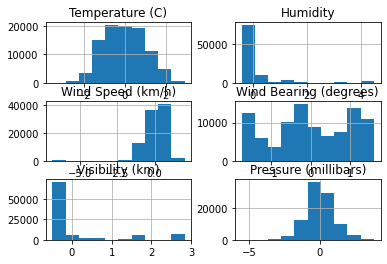

In [408]:
columnfeatures=['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']

X1[columnfeatures].hist()

Feature Discretization

In [409]:
from sklearn.preprocessing import KBinsDiscretizer
data = pd.DataFrame(X1, columns=['Wind Bearing (degrees)'])

# fit the scaler to the  data
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans') 
discretizer.fit(data)
_discretize = discretizer.transform(data)
X1['Wind Bearing (degrees)']=_discretize

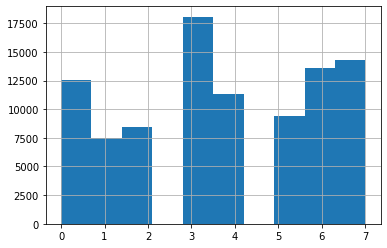

In [410]:
X1['Wind Bearing (degrees)'].hist()

In [411]:
X1.tail()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_na,x0_rain,x0_snow,x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Dangerously Windy and Partly Cloudy,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
95136,1.474089,-0.405973,0.262956,0.0,2.834916,-0.315518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95137,1.323925,-0.405973,0.187341,0.0,0.817807,-0.212680,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95138,1.057356,-0.405972,0.085585,0.0,2.834916,-0.148406,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95139,1.003227,-0.405968,0.224505,0.0,2.834916,-0.111127,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95140,0.889732,-0.405965,-0.272602,1.0,0.746737,-0.084132,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


significance of the features

                          Temperature (C)  ...  Apparent Temperature (C)
Temperature (C)                  1.000000  ...                  0.992648
Humidity                        -0.266483  ...                 -0.249475
Wind Speed (km/h)                0.027255  ...                 -0.023181
Wind Bearing (degrees)           0.029556  ...                  0.029006
Visibility (km)                  0.158395  ...                  0.158082
Pressure (millibars)            -0.310469  ...                 -0.288406
Apparent Temperature (C)         0.992648  ...                  1.000000

[7 rows x 7 columns]


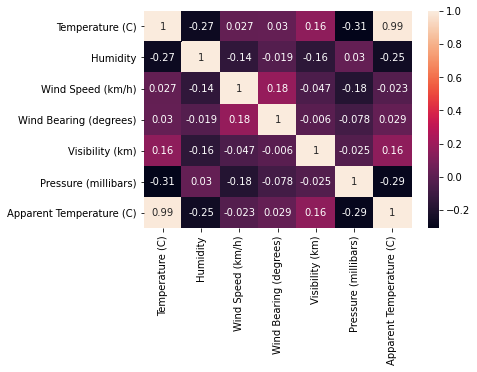

In [412]:
#test the signifncance of the features
d_data = X1.iloc[:,:6].copy()
d_data['Apparent Temperature (C)'] = y_true
d_data.head(10)
print(d_data.corr())
sns.heatmap(d_data.corr(),annot=True) 

PCA

In [413]:
pca = PCA()

X1_Scaled_pca = pca.fit_transform(X1) 


In [414]:
pca.explained_variance_ratio_

array([4.74785897e-01, 1.43928697e-01, 9.89785003e-02, 8.63311294e-02,
       7.26999774e-02, 5.14780238e-02, 2.62385176e-02, 1.62972101e-02,
       1.12676045e-02, 1.00544794e-02, 5.11954753e-03, 7.15358864e-04,
       6.98893885e-04, 4.82826771e-04, 3.79406827e-04, 1.07946057e-04,
       7.07849269e-05, 5.87735549e-05, 4.82135676e-05, 4.00938788e-05,
       3.68701587e-05, 3.43048920e-05, 3.22130079e-05, 3.16915855e-05,
       2.85549035e-05, 1.66541452e-05, 1.35557516e-05, 9.71093284e-06,
       6.78875555e-06, 3.88520682e-06, 1.08799510e-06, 9.33747487e-07,
       9.33719961e-07, 9.33640393e-07, 9.36350080e-32, 2.92259563e-33])

In [415]:
pca = PCA()

X1_Scaled_pca = PCA(n_components=7).fit_transform(X1) 

principalDf=pd.DataFrame(data =X1_Scaled_pca)

principalDf

,0,1,2,3,4,5,6
0,-1.339946,-0.643518,0.784567,-0.268540,1.317942,0.016879,0.633361
1,-1.339515,-0.669310,0.841186,-0.381101,1.264066,0.043916,0.633229
2,-0.243747,0.138435,0.251865,0.198190,-0.220649,0.609828,-0.713952
3,-1.332210,-0.578010,0.903390,-0.483398,1.255925,0.078133,0.637332
4,-1.314136,-0.496978,0.905898,-0.391573,1.219761,0.368756,-0.747122
...,...,...,...,...,...,...,...
95136,3.608763,-2.518857,1.374463,0.154172,1.660047,-0.770588,0.414623
95137,3.619170,-1.737864,0.252321,0.061818,0.173806,-0.713052,0.481091
95138,3.642515,-2.150052,1.533058,0.057598,1.694271,-0.566554,0.443024
95139,3.632106,-2.129125,1.472347,-0.057017,1.756811,-0.611358,0.446917


In [416]:
y=y_true
finalDf = pd.concat([principalDf, pd.DataFrame(y)], axis = 1)
finalDf.head(10)

,0,1,2,3,4,5,6,Apparent Temperature (C)
0,-1.339946,-0.643518,0.784567,-0.268540,1.317942,0.016879,0.633361,7.388889
1,-1.339515,-0.669310,0.841186,-0.381101,1.264066,0.043916,0.633229,7.227778
2,-0.243747,0.138435,0.251865,0.198190,-0.220649,0.609828,-0.713952,9.377778
3,-1.332210,-0.578010,0.903390,-0.483398,1.255925,0.078133,0.637332,5.944444
4,-1.314136,-0.496978,0.905898,-0.391573,1.219761,0.368756,-0.747122,6.977778
5,-1.335397,-0.100438,-0.056060,-0.481748,0.018700,0.000430,0.670469,7.111111
6,-1.304354,0.709506,-0.547760,0.212610,0.124778,-0.412934,0.650391,5.522222
7,-1.333312,0.147833,-0.361617,-0.435239,-0.245204,-0.059911,0.680950,6.527778
8,-1.318207,-0.001385,-0.159665,-0.390765,-0.478328,-0.047385,0.653707,10.822222
9,-2.328575,-0.166881,-0.123214,-0.315599,-0.581723,-0.210989,0.620388,13.772222


Splitting testing and training set

In [417]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [418]:
X_train,X_test,Y_train,Y_test= train_test_split(principalDf,y,test_size=0.2)

In [419]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
Y_train=Y_train.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)

In [420]:
X_train.head()

,0,1,2,3,4,5,6
0,0.748061,1.416268,-0.389787,-1.134533,0.270362,1.191468,0.432758
1,3.929366,2.828154,0.869104,-1.688620,-0.140318,0.660860,0.198633
2,-2.328895,-0.425202,0.064080,-0.024407,-0.288303,-0.202652,0.604012
3,2.869571,2.647623,0.242767,-0.629122,0.246996,-0.784088,0.018860
4,-2.361108,-0.289887,-0.303301,-0.447637,0.067263,0.027861,0.092876


In [421]:
Y_train.head()

,Apparent Temperature (C)
0,-9.161111
1,-12.222222
2,15.494444
3,-3.038889
4,13.466667


Linear Regression

In [422]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [423]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)
y_hat = lm.predict(X_test)

In [424]:
print(y_hat)

[[ 14.25357584]
 [  0.33677923]
 [-12.99824644]
 ...
 [ 25.66889568]
 [ 17.47187696]
 [-11.62758544]]


In [425]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_hat)

2.6008740530865446

In [426]:
#Root Mean Sqaured Error
from math import sqrt
rmsq = sqrt(mean_squared_error(Y_test, y_hat))
rmsq

1.6127225592415282

In [427]:
# percentage of explained variance of the predictions
print("accuracy:",lm.score(X_test,Y_test))

accuracy: 0.9773055660960216


In [428]:
Y_test

,Apparent Temperature (C)
0,14.883333
1,-3.055556
2,-11.161111
3,5.966667
4,-0.605556
...,...
19024,18.750000
19025,19.716667
19026,25.622222
19027,17.711111


In [429]:
print(lm.coef_)

[[-0.2145212  -6.41511963  0.92524949  3.60281895 -3.75577096 -5.70163794
  -1.40133747]]


In [430]:
print(lm.intercept_)

[10.87779065]


In [431]:
finaldataframe =pd.DataFrame(Y_test)
finaldataframe['y_hat']=y_hat
finaldataframe2=finaldataframe.reset_index(drop=True)
finaldataframe2.dtypes


Apparent Temperature (C)    float64
y_hat                       float64
dtype: object

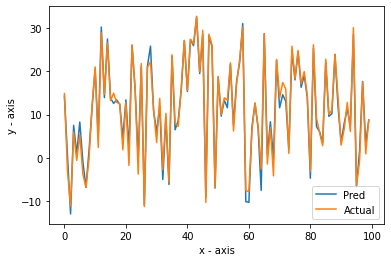

In [432]:
plt.plot(finaldataframe2['y_hat'][:100], label = "Pred")
plt.plot(finaldataframe2['Apparent Temperature (C)'][:100], label = "Actual")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.legend()
plt.show()